<a href="https://colab.research.google.com/github/BedoNassef71/BedoNassef71/blob/main/Egyptian_Monuments_%26_Landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d hossamhamza/egyptian-monuments-and-landmarks

100% 313M/313M [00:17<00:00, 20.7MB/s]
100% 313M/313M [00:17<00:00, 19.1MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/egyptian-monuments-and-landmarks.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [6]:
data_train_path = "/content/Dec_21_final_data_set_modified/dataset"
data_test_path = "/content/Dec_21_final_data_set_modified/feat_vec"
data_validation_path = "/content/Dec_21_final_data_set_modified/feat_vec"

In [7]:
img_size = (128, 128)

In [8]:
data_train = keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=img_size,
    batch_size=32,
    validation_split=False)

Found 3487 files belonging to 32 classes.


In [9]:
data_cat = data_train.class_names
data_cat

['Akhenaten',
 'Alhakim biAmr Allah',
 'Amenhotep III and Tiye',
 'Amr Ibn Al-Aas Mosque',
 'Azhar Mosque',
 'Babylon Fortress',
 'Bibliotheca Alexandrina',
 'Bust of Ramesses II',
 'Cairo Tower',
 'Egyptian Museum Tahrir',
 'Great Hypostyle Hall of Karnak',
 'Great Pyramids of Giza',
 'Hanging church',
 'Hatshepsut Statue',
 'Hatshepsut Temple',
 'Hatshepsut face',
 'Ibn Tulun Mosque',
 'Isis with her child',
 'Khan Elkhalili',
 'Mask of Tutankhamun',
 'Mohammed Ali Mosque in cairo citadel',
 'Mosque of Al Mahmudiyah',
 'Muizz Street',
 'Nefertiti',
 'Pyramid of Djoser',
 'Qaitbay Castle',
 'Ramesseum',
 'Sphinx',
 'Statue of King Zoser',
 'Statue of Ramesses II',
 'Statue of Tutankhamun with Ankhesenamun',
 'The Great Temple of Ramesses II']

In [10]:
data_val = keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=True,
    image_size=img_size,
    batch_size=32,
    validation_split=False)

Found 340 files belonging to 32 classes.


In [11]:
data_test = keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=img_size,
    batch_size=32,
    validation_split=False)

Found 340 files belonging to 32 classes.


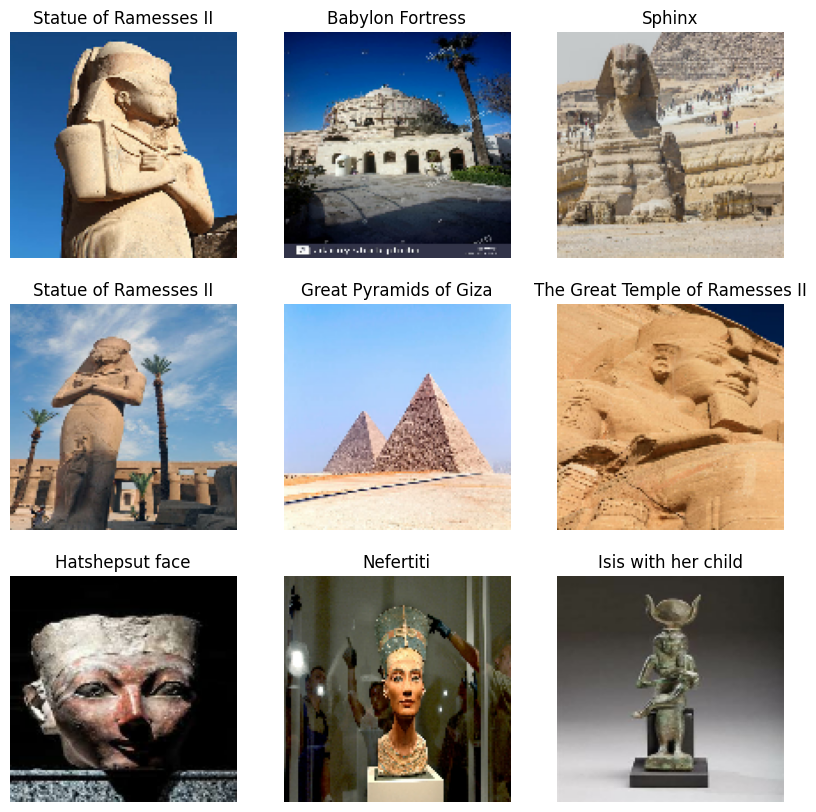

In [12]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from keras import Sequential, layers

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [15]:
model.compile(
              optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [16]:
epochs_size = 25

history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
109/109 [==============================] - 22s 111ms/step - loss: 2.0623 - accuracy: 0.4422 - val_loss: 1.9188 - val_accuracy: 0.4412
Epoch 2/25
109/109 [==============================] - 12s 104ms/step - loss: 1.0420 - accuracy: 0.6900 - val_loss: 0.7402 - val_accuracy: 0.7941
Epoch 3/25
109/109 [==============================] - 12s 105ms/step - loss: 0.6318 - accuracy: 0.8041 - val_loss: 0.3974 - val_accuracy: 0.8941
Epoch 4/25
109/109 [==============================] - 13s 115ms/step - loss: 0.3621 - accuracy: 0.8833 - val_loss: 0.1938 - val_accuracy: 0.9588
Epoch 5/25
109/109 [==============================] - 15s 133ms/step - loss: 0.1776 - accuracy: 0.9426 - val_loss: 0.1518 - val_accuracy: 0.9559
Epoch 6/25
109/109 [==============================] - 12s 101ms/step - loss: 0.1216 - accuracy: 0.9613 - val_loss: 0.0793 - val_accuracy: 0.9824
Epoch 7/25
109/109 [==============================] - 12s 111ms/step - loss: 0.0982 - accuracy: 0.9693 - val_loss: 0.1841 - val_ac

Text(0.5, 1.0, 'Loss')

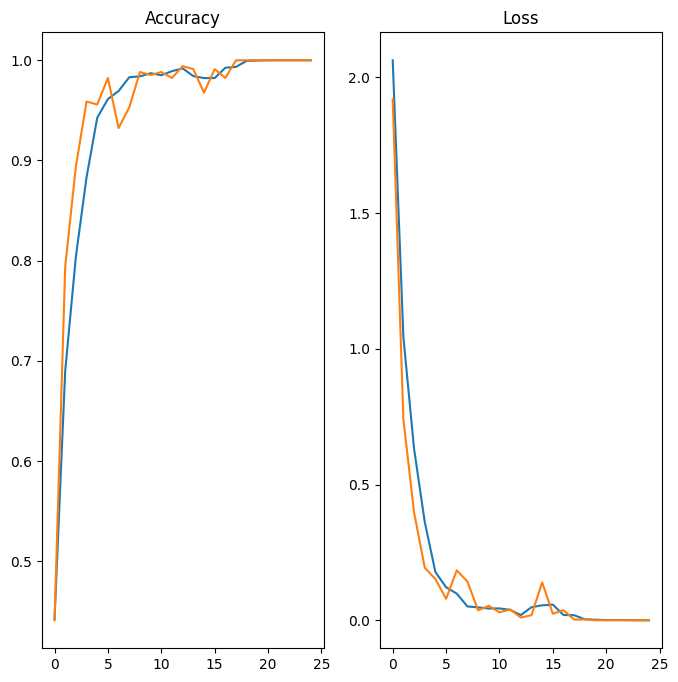

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = '/content/Dec_21_final_data_set_modified/dataset/Bust of Ramesses II/10.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_size))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 [==============================] - 0s 290ms/step
in image is Bust of Ramesses II with accuracy of 100.00


In [22]:
def classifyImage(path):
  image = path
  image = tf.keras.utils.load_img(image, target_size=(img_size))
  plt.imshow(image)
  plt.axis('off')
  plt.show()
  img_arr = tf.keras.utils.array_to_img(image)
  img_bat=tf.expand_dims(img_arr,0)
  predict = model.predict(img_bat)
  score = tf.nn.softmax(predict)
  print('in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

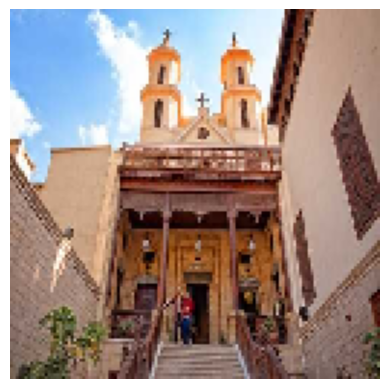

1/1 [==============================] - 0s 18ms/step
in image is Hanging church with accuracy of 100.00


In [23]:
classifyImage("/content/Dec_21_final_data_set_modified/dataset/Hanging church/108.jpg")

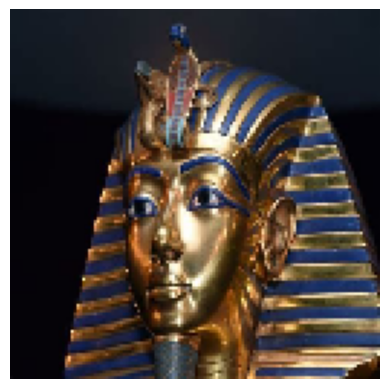

1/1 [==============================] - 0s 55ms/step
in image is Mask of Tutankhamun with accuracy of 100.00


In [24]:
classifyImage("/content/Dec_21_final_data_set_modified/dataset/Mask of Tutankhamun/1.jpg")

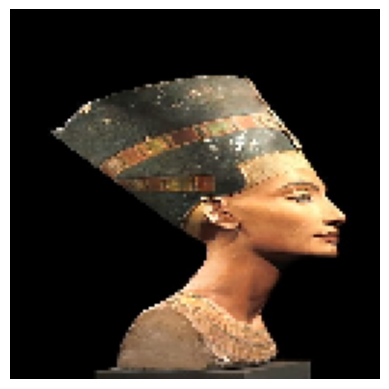

1/1 [==============================] - 0s 18ms/step
in image is Nefertiti with accuracy of 100.00


In [25]:
classifyImage("/content/Dec_21_final_data_set_modified/dataset/Nefertiti/11.jpg")

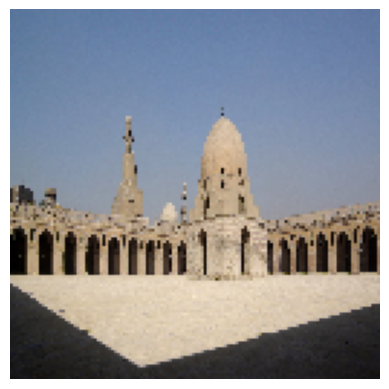

1/1 [==============================] - 0s 34ms/step
in image is Ibn Tulun Mosque with accuracy of 100.00


In [27]:
classifyImage("/content/Dec_21_final_data_set_modified/feat_vec/Ibn Tulun Mosque/Kairo_Ibn_Tulun_Moschee_BW_4.jpg")

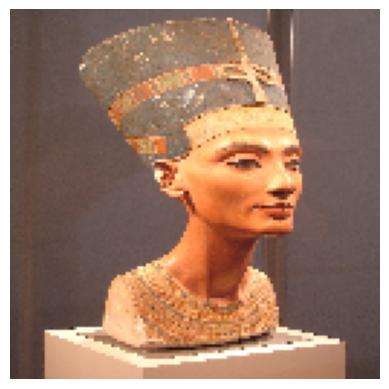

1/1 [==============================] - 0s 47ms/step
in image is Nefertiti with accuracy of 100.00


In [28]:
classifyImage("/content/Nefertiti_berlin.jpg")